In [0]:
from pyspark.sql import functions as F

In [0]:
df = spark.read.table("msba_6331_group1.default.accidents_final")
df = df.withColumn("Start_Time", F.to_timestamp(df.Start_Time)) \
    .withColumn("End_Time", F.to_timestamp(df.End_Time)) \
    .withColumn("Severity", df.Severity.cast("double")) \
    .withColumn("accident_duration_mins", ((F.col("End_Time").cast("long") - F.col("Start_Time").cast("long"))/60))
# df.printSchema()
df.count()

50563

In [0]:
# df_model = df.drop("ID", "Source", "Start_Time", "End_Time", "Start_Lat", "Start_Lng", "End_Lat", "End_Lng", "Street", "City", "County", "Zipcode", "Description", "Country", "Timezone", "Airport_Code", "Weather_Timestamp", "Wind_Direction", "Weather_Condition", "Distance_miles", "Precipitation_in")
df_model = df
df_model.limit(10).display()

ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance_miles,Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature_F,Wind_Chill_F,Humidity_percent,Pressure_in,Visibility_mi,Wind_Direction,Wind_Speed_mph,Precipitation_in,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,accident_duration_mins
A-7746881,Source1,0.0,2019-08-26T17:47:31Z,2019-08-26T18:15:55Z,33.011406,-117.07993,33.021484,-117.0788,0.7,At George Cooke Express Dr - Accident. Lane blocked.,Escondido Fwy N,San Diego,San Diego,CA,92128,US,US/Pacific,KRNM,2019-08-26 17:53:00,85.0,85.0,27.0,28.4,10.0,W,10.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,28.4
A-1926484,Source2,0.0,2019-08-21T15:53:11Z,2019-08-21T17:37:08Z,37.89468,-122.11463,null,null,0.0,#1 lane blocked due to accident on CA-24 Eastbound after 1st St.,CA-24 E,Lafayette,Contra Costa,CA,94549,US,US/Pacific,KCCR,2019-08-21 15:53:00,92.0,92.0,26.0,29.79,10.0,W,10.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,103.95
A-1941046,Source2,0.0,2019-08-29T21:26:29Z,2019-08-29T22:41:05Z,36.17692,-95.99352,null,null,0.0,Accident on Pine St at Martin Luther King Jr Blvd.,N Martin Luther King Jr Blvd,Tulsa,Tulsa,OK,74106,US,US/Central,KTUL,2019-08-29 21:53:00,83.0,83.0,74.0,29.25,10.0,E,7.0,0.0,Fair,False,False,True,False,False,False,False,False,False,False,False,True,False,Night,Night,Night,Night,74.6
A-2007527,Source2,1.0,2019-08-06T16:29:51Z,2019-08-06T16:59:33Z,41.90592,-87.92125,null,null,0.0,Lane blocked due to accident on I-294 Tri-State Tollway Northbound at Exit 33 I-290 Eisenhower Expy Exits 13A 13B.,US-20 E,Elmhurst,DuPage,IL,60126,US,US/Central,KORD,2019-08-06 16:51:00,84.0,84.0,44.0,29.09,10.0,NNW,9.0,0.0,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,29.7
A-2024075,Source2,1.0,2019-08-15T17:50:58Z,2019-08-15T19:35:28Z,42.902653,-73.78612,null,null,0.0,Left hand shoulder blocked due to accident on I-87 Southbound before Exit 10 Ushers Rd.,Ushers Rd,Clifton Park,Saratoga,NY,12065,US,US/Eastern,KSCH,2019-08-15 17:56:00,75.0,75.0,78.0,29.57,10.0,CALM,0.0,0.0,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,104.5
A-7776771,Source1,1.0,2019-08-21T13:53:16Z,2019-08-21T18:38:06Z,34.17508,-118.39261,34.186417,-118.40119,0.924,Closed between Burbank Blvd and Victory Blvd - Road closed due to accident.,CA-170 N,Valley Village,Los Angeles,CA,91607,US,US/Pacific,KBUR,2019-08-21 13:53:00,91.0,91.0,34.0,28.98,10.0,S,8.0,0.0,Fair,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,284.8333333333333
A-7775264,Source1,0.0,2019-08-19T17:02:10Z,2019-08-19T17:32:00Z,40.00982,-74.85037,40.00935,-74.84998,0.038,Ramp to Rancocas Rd - Accident. Lane blocked.,I-295 N,Mount Holly,Burlington,NJ,08060,US,US/Eastern,KVAY,2019-08-19 17:18:00,82.0,82.0,74.0,29.86,10.0,VAR,5.0,0.0,Thunder in the Vicinity,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,29.833333333333332
A-7746875,Source1,0.0,2019-08-26T16:04:19Z,2019-08-26T16:34:15Z,33.57508,-117.67168,33.58447,-117.67155,0.649,At Oso Pky/Exit 88 - Accident.,San Diego Fwy S,Mission Viejo,Orange,CA,92691,US,US/Pacific,KSNA,2019-08-26 15:53:00,83.0,83.0,47.0,29.75,10.0,SSW,12.0,0.0,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,29.933333333333334
A-2011913,Source2,0.0,2019-08-09T09:10:53Z,2019-08-09T11:40:47Z,35.12182,-80.78035,null,null,0.0,Accident on Lynbridge Dr at NC-16 Providence Rd.,Providence Rd,Charlotte,Mecklenburg,NC,28226-7714,US,US/Eastern,KCLT,2019-08-09 08:52:00,

In [0]:
label = "Severity"

numerical_cols = ['Temperature_F', 'Wind_Chill_F', 'Humidity_percent', 'Pressure_in', 'Visibility_mi', 'Wind_Speed_mph', 'accident_duration_mins']

cat_cols = ['State'] 

boolean_cols = ['Amenity', 'Crossing','Give_Way','Junction', 'Railway', 'Station','Stop','Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']

In [0]:
from pyspark.ml.feature import OneHotEncoder, StandardScaler, SQLTransformer, StringIndexer, VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier, DecisionTreeClassificationModel, LogisticRegression
from pyspark.ml import Pipeline, PipelineModel

In [0]:

# df_model_si = si.fit(df_model_limit_10).transform(df_model_limit_10)
# df_model_si.display()

# df_model_ohe = ohe.fit(df_model_si).transform(df_model_si)
# df_model_ohe.display()

# df_model_num_va = va.transform(df_model_ohe)
# df_model_num_va.limit(10).display()

# df_model_scaled = sc.fit(df_model_num_va).transform(df_model_num_va)
# df_model_scaled.limit(10).display()

#df_model_va = va_features.transform(df_model_scaled)
# df_model_va.limit(10).display()

In [0]:
# cat_cols_ohe
si_input_cols = cat_cols + boolean_cols
si_output_cols = [ col+"_si" for col in si_input_cols]
ohe_input_cols = [ col+"_si" for col in cat_cols ]
ohe_output_cols = [ col+"_ohe" for col in cat_cols ]


si = StringIndexer(inputCols=si_input_cols, outputCols=si_output_cols, handleInvalid='keep')
ohe = OneHotEncoder(inputCols=ohe_input_cols, outputCols=ohe_output_cols, handleInvalid='keep')
va = VectorAssembler(inputCols = numerical_cols, outputCol="numerical_features")
sc = StandardScaler(inputCol="numerical_features", outputCol="numerical_scaled")

#combine all ohe + SI + sc
input_features = [col+"_ohe" for col in cat_cols] + [col+"_si" for col in boolean_cols] + [sc.
getOutputCol()]
va_features = VectorAssembler(inputCols=input_features, outputCol="features")


In [0]:
training, test = df_model.randomSplit([0.7, 0.3], 0)
 
training.cache()
test.cache()
 
print("There are {} training and {} test points.".format(training.count(), test.count()))

There are 35350 training and 15213 test points.


In [0]:
no_of_classes = training.selectExpr("Severity").distinct().count()
overall_count = training.count()
class_0, class_1 = training.groupBy("Severity").count().orderBy("count", ascending=False).collect()[0], training.groupBy("Severity").count().orderBy("count", ascending=False).collect()[1] # access class_0[1], class_1[1] to get each class counts
## weighing scheme 1
zero_wt = overall_count/(no_of_classes * class_0[1])
non_zero_wt = overall_count/(no_of_classes * class_1[1])

## weighing scheme 2
# zero_wt = overall_count/class_0[1]
# non_zero_wt = overall_count/class_1[1]

zero_wt, non_zero_wt

(0.6970186923258932, 1.7689151321056846)

In [0]:
training = training.withColumn("weightCol", F.when(training.Severity == 0, zero_wt).otherwise(non_zero_wt))

training.limit(5).display()

ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance_miles,Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature_F,Wind_Chill_F,Humidity_percent,Pressure_in,Visibility_mi,Wind_Direction,Wind_Speed_mph,Precipitation_in,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,accident_duration_mins,weightCol
A-1791519,Source2,0.0,2019-11-01T08:27:31Z,2019-11-01T09:29:51Z,39.452465,-74.53608,null,null,0.0,Right hand shoulder blocked due to accident on Garden State Pkwy Northbound after Exit 40 US-30.,Garden State Pkwy N,Absecon,Atlantic,NJ,08205,US,US/Eastern,KACY,2019-11-01 08:54:00,46.0,39.0,57.0,30.01,10.0,WNW,17.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,62.333333333333336,0.6970186923258932
A-1791555,Source2,0.0,2019-11-01T10:46:28Z,2019-11-01T13:08:41Z,40.85328,-73.83377,null,null,0.0,Accident on Mayflower Ave at 195th St.,E 195th St,Bronx,Bronx,NY,10461-3914,US,US/Eastern,KLGA,2019-11-01 10:51:00,49.0,42.0,44.0,30.0,10.0,W,21.0,0.0,Fair / Windy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,142.21666666666667,0.6970186923258932
A-1791591,Source2,1.0,2019-11-01T15:44:32Z,2019-11-01T16:59:17Z,40.857105,-73.96836,null,null,1.59,Right lane blocked due to accident and stalled vehicle on I-95 George Washington Bridge Upper Level Northbound from Henry Hudson Pkwy to Palisades Interstate Pkwy.,Center Ave,Fort Lee,Bergen,NJ,07024-5808,US,US/Eastern,KTEB,2019-11-01 15:51:00,56.0,56.0,36.0,30.08,10.0,NW,14.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,74.75,1.7689151321056846
A-1791775,Source2,0.0,2019-11-01T05:55:49Z,2019-11-01T06:55:28Z,40.16366,-83.04492,null,null,0.0,Accident on OH-315 Olentangy River Rd at Retreat Ln.,Retreat Ln,Powell,Delaware,OH,43065,US,US/Eastern,KOSU,2019-11-01 05:53:00,32.0,22.0,66.0,29.25,10.0,W,15.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,59.65,0.6970186923258932
A-1791925,Source2,0.0,2019-11-01T14:17:53Z,2019-11-01T15:52:58Z,35.198933,-80.771675,null,null,0.0,Accident on US-74 Independence Blvd at Pierson Dr.,E Independence Blvd,Charlotte,Mecklenburg,NC,28205,US,US/Eastern,KCLT,2019-11-01 13:52:00,56.0,56.0,44.0,29.45,10.0,VAR,5.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,95.08333333333333,0.6970186923258932


In [0]:
# StringIndexer: Convert the input column "label" (digits) to categorical values
# indexer = StringIndexer(inputCol="label", outputCol="indexedLabel")
# DecisionTreeClassifier: Learn to predict column "indexedLabel" using the "features" column
# dtc = DecisionTreeClassifier(labelCol="indexedLabel")
lr = LogisticRegression(featuresCol='features', labelCol="Severity", weightCol='weightCol')
# Chain indexer + dtc together into a single ML Pipeline
pipeline = Pipeline(stages=[si, ohe, va, sc, va_features, lr])

In [0]:
# Create an evaluator.  In this case, use "weightedPrecision".
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(labelCol="Severity", metricName="areaUnderPR", weightCol='weightCol')
evaluator_roc = BinaryClassificationEvaluator(labelCol="Severity", metricName="areaUnderROC", weightCol='weightCol')

In [0]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [0]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
# Other imports and your model setup

# Set up the parameter grid
# grid = ParamGridBuilder() \
#     .addGrid(dtc.maxDepth, [4, 6]) \
#     .addGrid(dtc.maxBins, [4, 6]) \
#     .build()

grid = ParamGridBuilder() \
        .addGrid(lr.regParam, [0.01, 0.9]) \
        .addGrid(lr.elasticNetParam, [0.5, 0.9]) \
        .addGrid(lr.threshold, [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95]) \
        .build()

# Set up cross-validation
# cv = CrossValidator(estimator=pipeline, evaluator=evaluator, estimatorParamMaps=grid, numFolds=3)
cv = CrossValidator(
    estimator=pipeline, 
    estimatorParamMaps=grid, 
    evaluator=evaluator_roc, 
    numFolds=3,
    collectSubModels=True  # Ensure this is set to True
)

# Run cross-validation
cvModel = cv.fit(training)

Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

In [0]:
pipeline_path = "dbfs:/FileStore/artifacts/pipeline_accidents/logistic_weighted"
pipeline_model_path = "dbfs:/FileStore/artifacts/pipeline_model_accidents/logistic_weighted"

pipeline.write().overwrite().save(pipeline_path)
cvModel.bestModel.write().overwrite().save(pipeline_model_path)

In [0]:
from pyspark.ml import Pipeline, PipelineModel
pipeline_for_inference = Pipeline.load(pipeline_path)
pipeline_model_for_inference = PipelineModel.load(pipeline_model_path)

In [0]:
test = test.withColumn("weightCol", F.lit(1))
cv_test_results = pipeline_model_for_inference.transform(test)
cv_test_results.limit(10).display()

ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance_miles,Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature_F,Wind_Chill_F,Humidity_percent,Pressure_in,Visibility_mi,Wind_Direction,Wind_Speed_mph,Precipitation_in,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,accident_duration_mins,weightCol,State_si,Amenity_si,Crossing_si,Give_Way_si,Junction_si,Railway_si,Station_si,Stop_si,Traffic_Signal_si,Sunrise_Sunset_si,Civil_Twilight_si,Nautical_Twilight_si,Astronomical_Twilight_si,State_ohe,numerical_features,numerical_scaled,features,rawPrediction,probability,prediction
A-1791414,Source2,0.0,2019-11-01T15:04:36Z,2019-11-01T16:23:16Z,42.99598,-83.63405,null,null,0.67,Lane blocked due to accident on Center Rd from Clarice Ave to Byers St.,Byers St,Burton,Genesee,MI,48519-1042,US,US/Eastern,KFNT,2019-11-01 14:53:00,41.0,34.0,62.0,29.35,10.0,SW,13.0,0.0,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,78.66666666666667,1,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Map(vectorType -> sparse, length -> 49, indices -> List(8), values -> List(1.0))","Map(vectorType -> dense, length -> 7, values -> List(41.0, 34.0, 62.0, 29.350000381469727, 10.0, 13.0, 78.66666666666667))","Map(vectorType -> dense, length -> 7, values -> List(2.1052600640134984, 1.543528093946055, 2.7237547351753872, 25.882429608589437, 3.3182918924869815, 2.407999790905502, 0.018347598137012946))","Map(vectorType -> sparse, length -> 68, indices -> List(8, 61, 62, 63, 64, 65, 66, 67), values -> List(1.0, 2.1052600640134984, 1.543528093946055, 2.7237547351753872, 25.882429608589437, 3.3182918924869815, 2.407999790905502, 0.018347598137012946))","Map(vectorType -> dense, length -> 2, values -> List(-0.5853562970732138, 0.5853562970732138))","Map(vectorType -> dense, length -> 2, values -> List(0.3577010432815458, 0.6422989567184543))",1.0
A-1791738,Source2,0.0,2019-11-01T21:21:32Z,2019-11-01T21:51:04Z,40.27767,-76.84049,null,null,0.0,Accident on Canby St at Union Deposit Rd.,Market Street Rd,Harrisburg,Dauphin,PA,17109-5717,US,US/Eastern,KCXY,2019-11-01 20:56:00,44.0,40.0,49.0,29.91,10.0,NW,8.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,29.533333333333335,1,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,"Map(vectorType -> sparse, length -> 49, indices -> List(10), values -> List(1.0))","Map(vectorType -> dense, length -> 7, values -> List(44.0, 40.0, 49.0, 29.90999984741211, 10.0, 8.0, 29.533333333333335))","Map(vectorType -> dense, length -> 7, values -> List(2.2593034833315593, 1.8159154046424175, 2.15264487134829, 26.376267651850668, 3.3182918924869815, 1.4818460251726169, 0.006888123707370115))","Map(vectorType -> sparse, length -> 68, indices -> List(10, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 2.2593034833315593, 1.8159154046424175, 2.15264487134829, 26.376267651850668, 3.3182918924869815, 1.4818460251726169, 0.006888123707370115))","Map(vectorType -> dense, length -> 2, values -> List(-0.7148194903048855, 0.7148194903048855))","Map(vectorType -> dense, length -> 2, values -> List(0.32853478492302074, 0.6714652150769793))",1.0
A-1792132,Source2,0.0,2019-11-01T06:56:05Z,2019-11-01T08:27:00Z,26.33127,-81.75691,null,null,0.0,Accident on CR-865 Bonita Beach Rd near Saradrienne Ln.,Downs Dr,Bonita Springs,Lee,FL,34135,US,US/Eastern,KAPF,2019-11-01 06:53:00,77.0,77.0,90.0,30.03,10.0,CALM,0.0,0.0,Fair,False,False,True,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day,90.91666666666667,1,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,"Map(vectorType -> sparse, length -> 49, indices -> List(2), values -> List(1.0))",

In [0]:
evaluator.evaluate(cv_test_results)

0.5123203984495905

In [0]:
evaluator_roc.evaluate(cv_test_results)

0.7410179338622551

In [0]:
cv_test_results.groupBy("Severity", "Prediction").count().display()

Severity,Prediction,count
1.0,1.0,2375
0.0,1.0,2424
1.0,0.0,1888
0.0,0.0,8526


Databricks visualization. Run in Databricks to view.

In [0]:
import matplotlib.pyplot as plt
# from pyspark.ml.evaluation import BinaryClassificationEvaluator
from sklearn.metrics import roc_curve, auc
# Select the probability for the positive class
import pyspark.sql.functions as F
from pyspark.sql.types import FloatType

# If the probability column is a vector (common in PySpark), extract the relevant probability
to_prob_udf = F.udf(lambda v: float(v[1]), FloatType())
cv_test_results_2 = cv_test_results.withColumn("probability", to_prob_udf("probability"))

# Collect the data to the driver
local_data = cv_test_results_2.select("Severity", "probability").toPandas()

fpr, tpr, thresholds = roc_curve(local_data['Severity'], local_data['probability'])
roc_auc = auc(fpr, tpr)

# fpr, tpr, thresholds, roc_auc

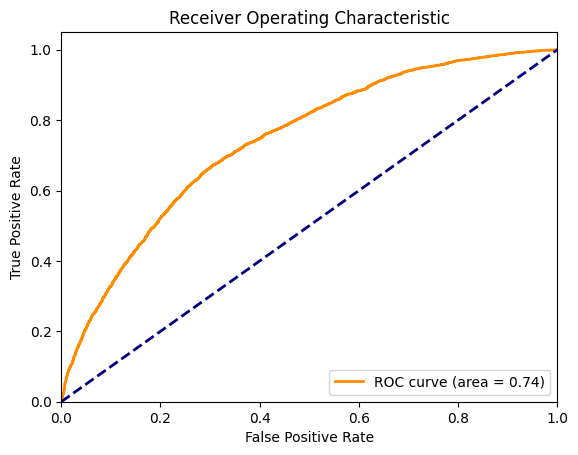

In [0]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()